# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import numpy as np
# read csv file
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [6]:
df.shape

(100000, 9)

In [7]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
# df.describe(include=['Object'])

In [11]:
df["bmi"].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

In [12]:
df["hypertension"].describe()

count    100000.00000
mean          0.07485
std           0.26315
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: hypertension, dtype: float64

In [13]:
df["smoking_history"].describe()

count      100000
unique          6
top       No Info
freq        35816
Name: smoking_history, dtype: object

In [14]:
df["gender"].describe()

count     100000
unique         3
top       Female
freq       58552
Name: gender, dtype: object

In [15]:
df.duplicated().sum()

3854

In [16]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [21]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing *100)))
    print(df.shape)

gender-0%
(100000, 9)
age-0%
(100000, 9)
hypertension-0%
(100000, 9)
heart_disease-0%
(100000, 9)
smoking_history-0%
(100000, 9)
bmi-0%
(100000, 9)
HbA1c_level-0%
(100000, 9)
blood_glucose_level-0%
(100000, 9)
diabetes-0%
(100000, 9)


(100000, 9)


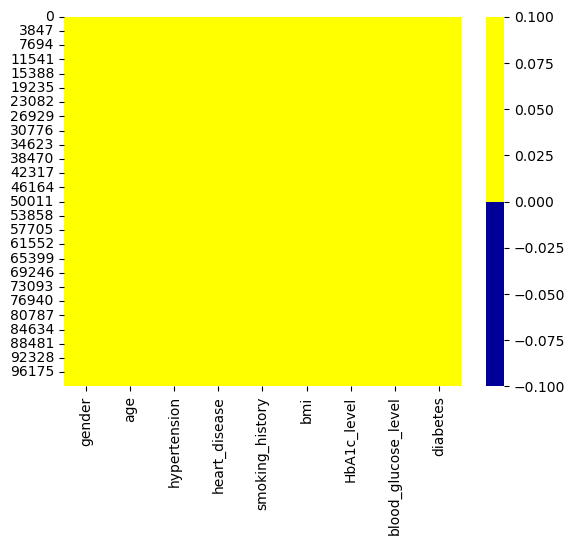

In [3]:
# ploting heat map  to better understand missing values.
# importing seaborn libary

cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
print(df.shape)

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

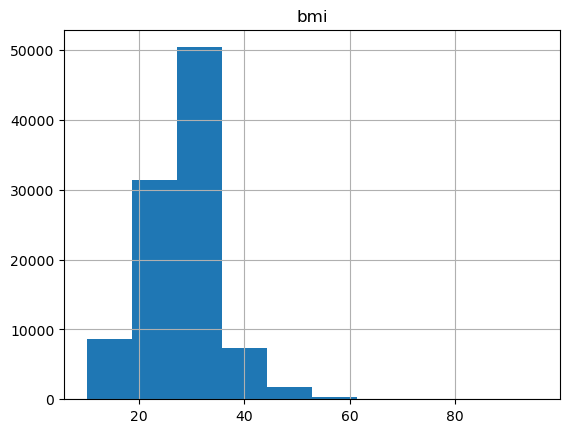

In [5]:
df.hist('bmi')
plt.show()

# show the distribution of bmi values


<Axes: xlabel='bmi', ylabel='age'>

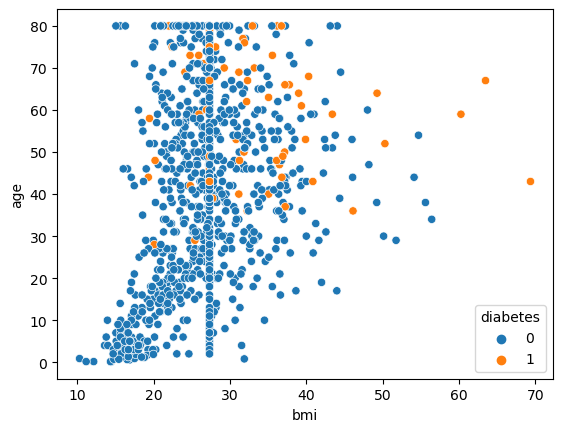

In [10]:
sns.scatterplot(data= df.head(1000), x='bmi', y='age', hue='diabetes')

# SHow the distribution of bmi by  age and domain type

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
majority of dataset  was with only duplicate values reprenting its a clean data...attributes with smoking history is not necesary and need a attribute of family history
2. Do you have any concerns about your dataset? 
the data i got has attributes of binary type ...in further they should be explained in detailed
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
for next phase of data cleaning remove my duplicate values ...to get my analysis accurate.